# Visualising Time Trends

In [35]:
#understand how patent numbers evolve for each technology, and by 3 patent accumulation criteria
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def sum_all_countries(df):
    total_count = []
    granted_count = []
    granted_family_ge_2_count = []
    deaths = []
    affected = []
    damages = []
    years = pd.unique(df['year'])
    for year in range(1985,2018 + 1):
        year_ind = (df['year'] == year)
        total_count.append(sum(df['total_count'][year_ind]))
        granted_count.append(sum(df['granted_count'][year_ind]))
        granted_family_ge_2_count.append(sum(df['granted_family_ge_2_count'][year_ind]))
        deaths.append(sum(df['total_deaths'][year_ind]))
        affected.append(sum(df['total_affected'][year_ind]))
        damages.append(sum(df['total_damages_adj'][year_ind]))
    df_sum = pd.DataFrame.from_records({'year':np.arange(1985, 2018 + 1),
                                        'patents_total_count':total_count,
                                        'patents_granted_count':granted_count,
                                        'patents_granted_family_ge_2_count':granted_family_ge_2_count,
                                        'total_deaths':deaths,
                                        'total_affected':affected,
                                        'total_damages_adj':damages
                                       })
    return df_sum

def gen_plot(prefix):
    df = pd.read_csv(prefix + '_panel_combined.csv', skipinitialspace=True, header=0)
    df.fillna(0, inplace=True)
    df_sum = sum_all_countries(df)

    plt.rcParams["figure.figsize"]=12,7
    df_sum.plot(x='year',y=['patents_total_count','patents_granted_count','patents_granted_family_ge_2_count'])
    plt.title(prefix + ' patents and events')
    plt.show() 
    plt.figure()
    df_sum.plot(x='year',y=['total_deaths','total_affected','total_damages_adj'], subplots=True)
    plt.show() 
    
def sum_pat_all_countries(df):
    total_count = []
    granted_count = []
    granted_family_ge_2_count = []
    years = pd.unique(df['year'])
    for year in range(1985,2018 + 1):
        year_ind = (df['year'] == year)
        total_count.append(sum(df['total_count'][year_ind]))
        granted_count.append(sum(df['granted_count'][year_ind]))
        granted_family_ge_2_count.append(sum(df['granted_family_ge_2_count'][year_ind]))
    df_sum = pd.DataFrame.from_records({'year':np.arange(1985, 2018 + 1),
                                        'patents_total_count':total_count,
                                        'patents_granted_count':granted_count,
                                        'patents_granted_family_ge_2_count':granted_family_ge_2_count
                                       })
    return df_sum

def gen_pat_plot(prefix):
    df = pd.read_csv('/Volumes/NJ_4TB/PATSAT/MyFiles/' + prefix + '_panel.csv', skipinitialspace=True, header=0)
    df.fillna(0, inplace=True)
    df_sum = sum_pat_all_countries(df)

    plt.rcParams["figure.figsize"]=12,7
    df_sum.plot(x='year',y=['patents_total_count','patents_granted_count','patents_granted_family_ge_2_count'])
    plt.title(prefix + ' patents and events')
    plt.show() 

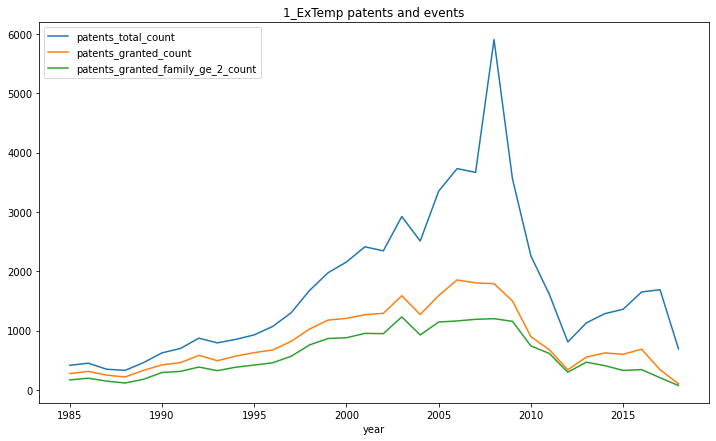

<Figure size 864x504 with 0 Axes>

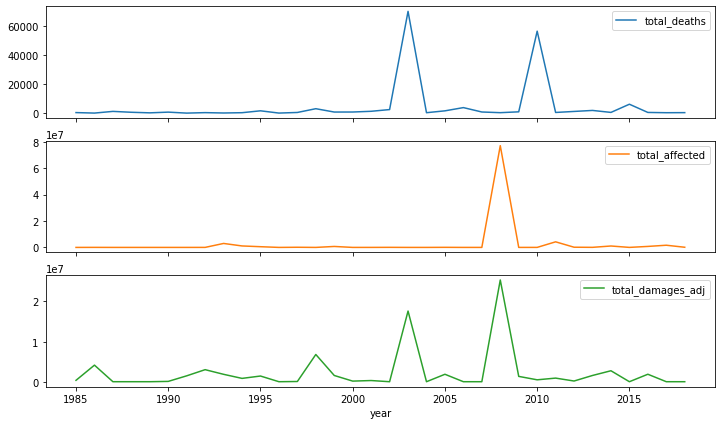

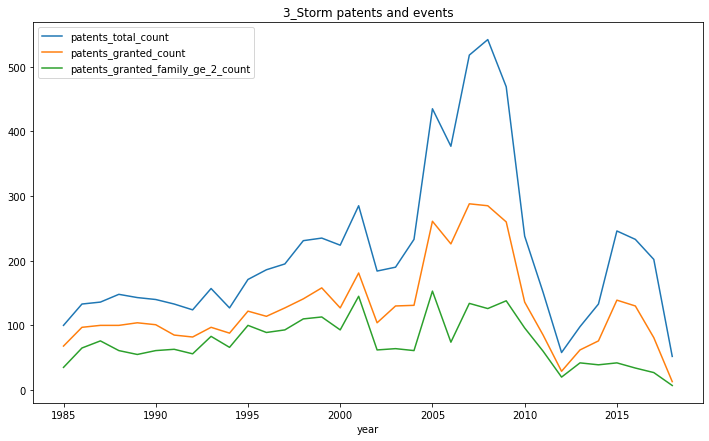

<Figure size 864x504 with 0 Axes>

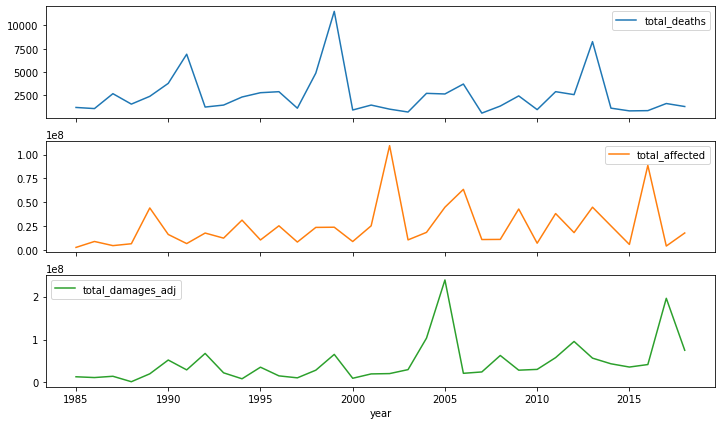

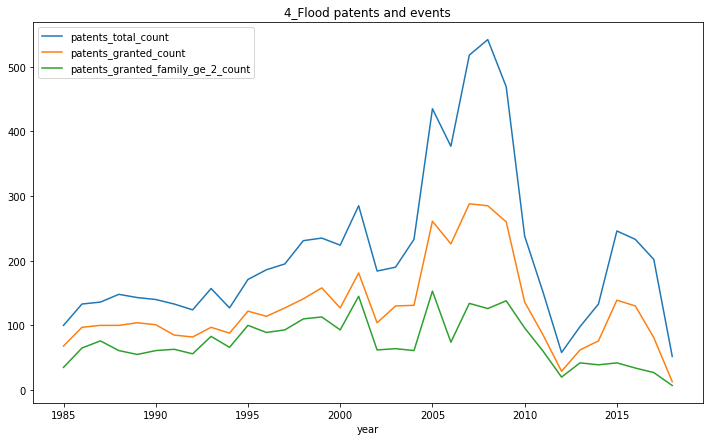

<Figure size 864x504 with 0 Axes>

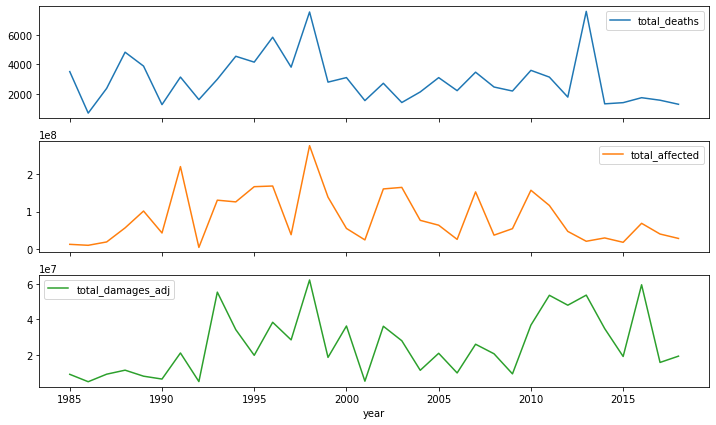

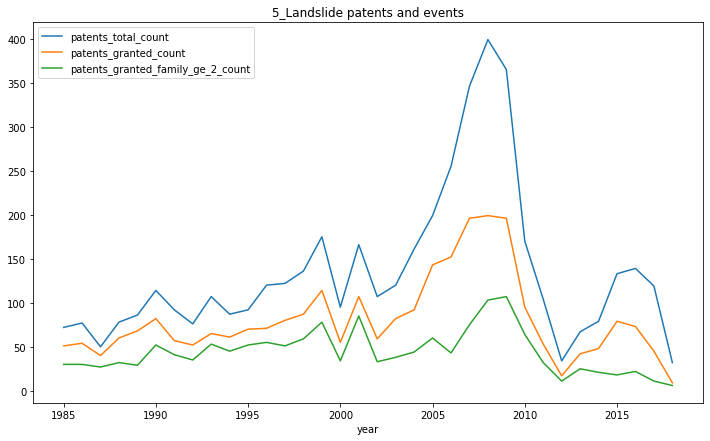

<Figure size 864x504 with 0 Axes>

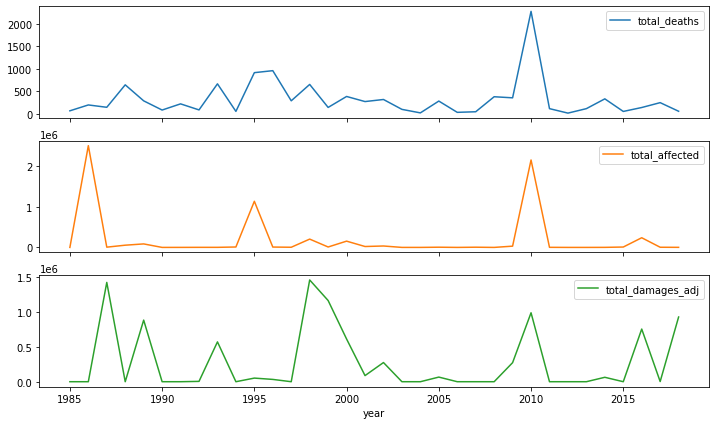

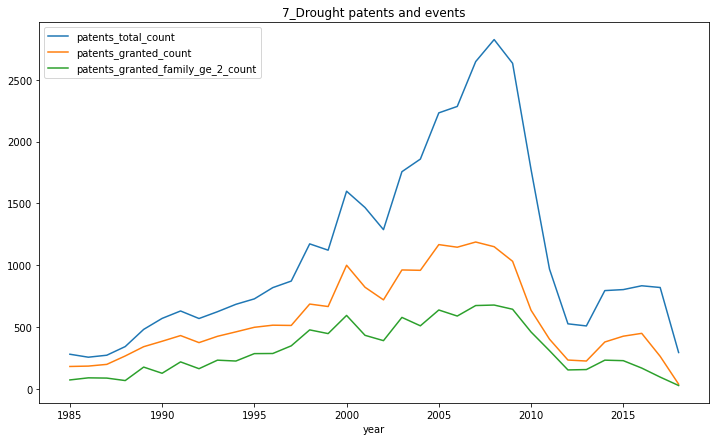

<Figure size 864x504 with 0 Axes>

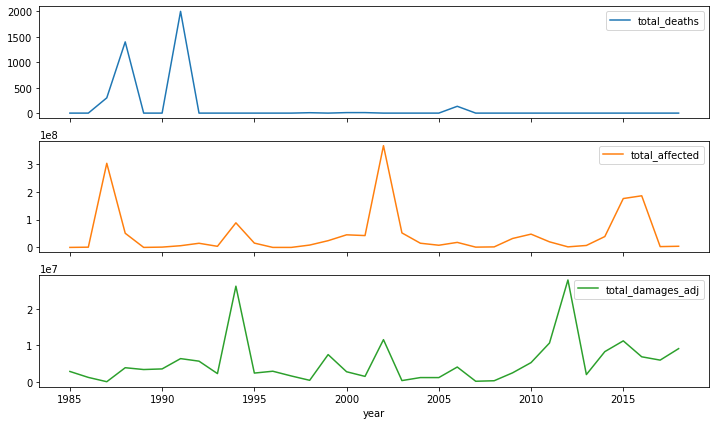

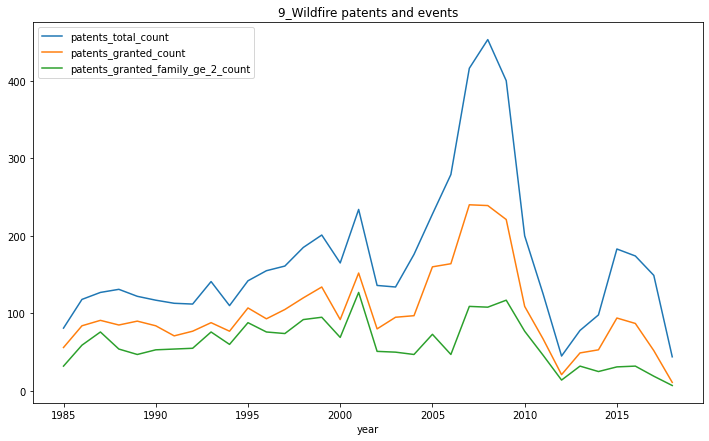

<Figure size 864x504 with 0 Axes>

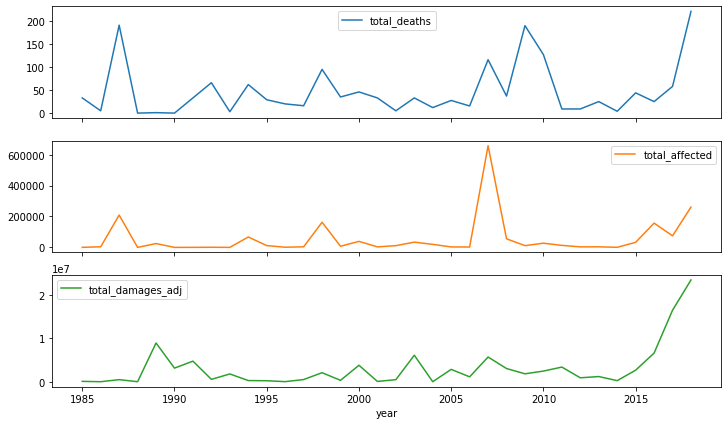

In [36]:
patsat_names = ['1_ExTemp', '3_Storm', '4_Flood', '5_Landslide', '7_Drought', '9_Wildfire']
for c in patsat_names:
    gen_plot(c)

In [37]:
#understand how tax-adjusted fuel prices evolve (later)

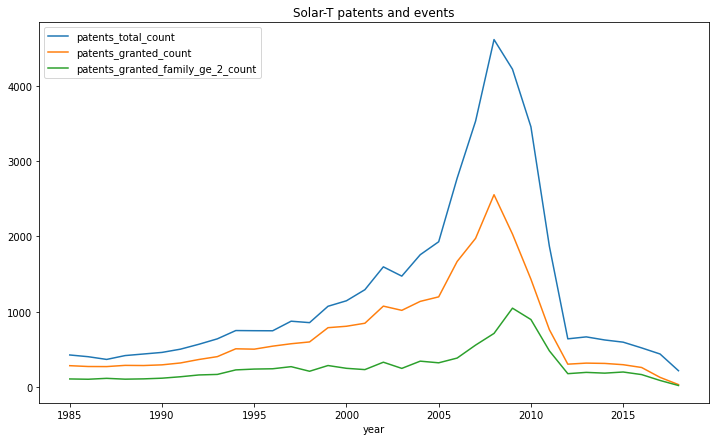

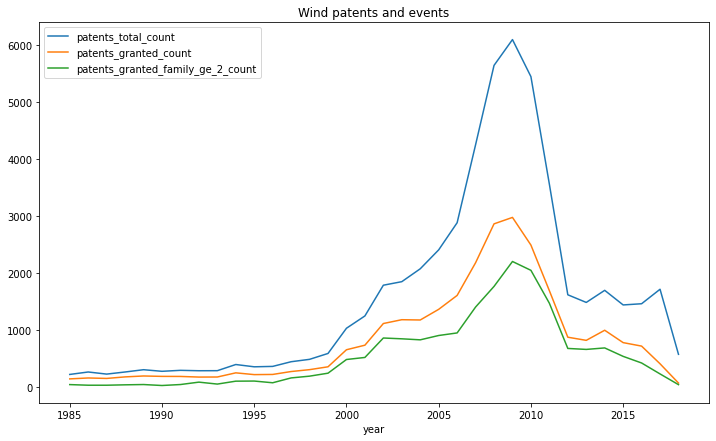

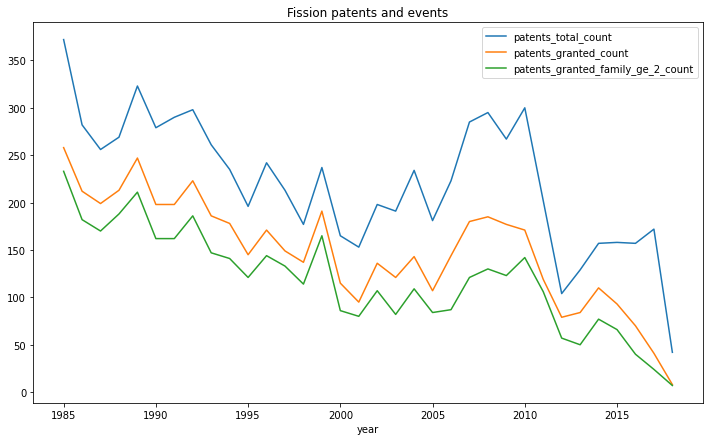

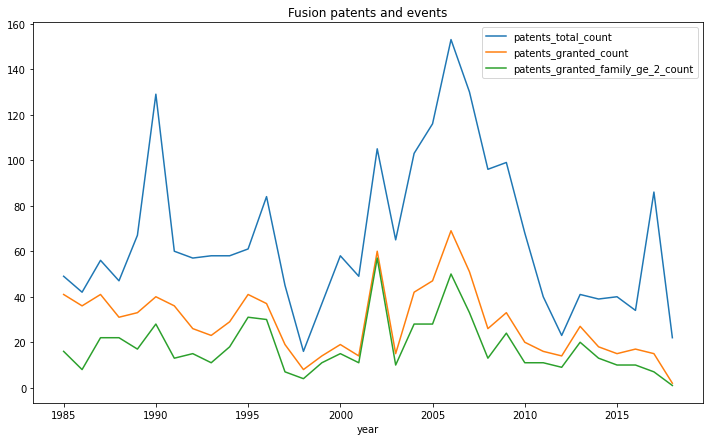

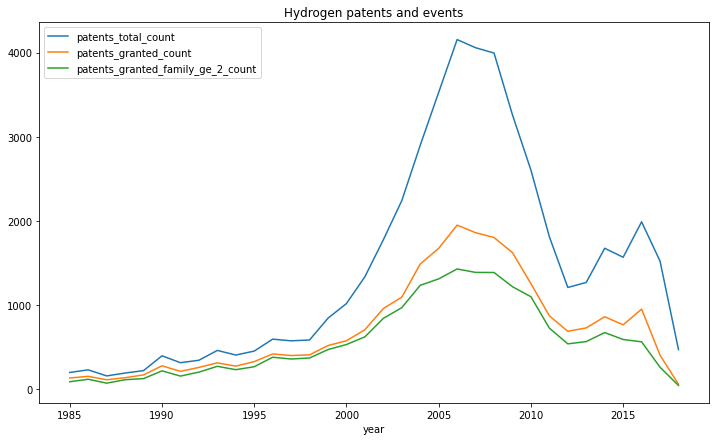

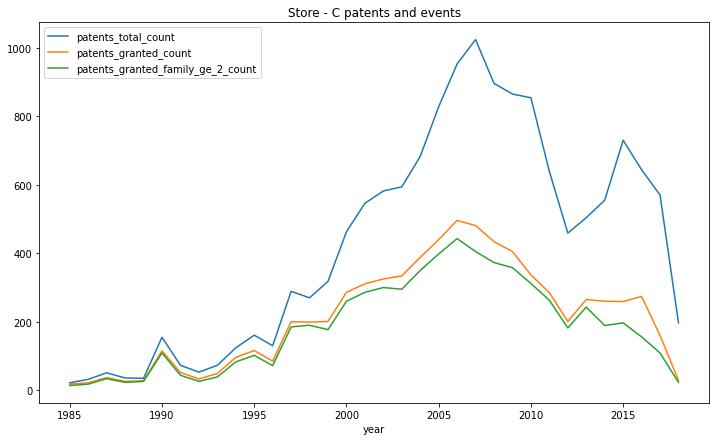

In [38]:
patsat_names = ['Solar-T', 'Wind', 'Fission', 'Fusion', 'Hydrogen', 'Store - C']
for c in patsat_names:
    gen_pat_plot(c)


# Statistics

### Table 1

In [39]:
patsat_names = ['1_ExTemp', '3_Storm', '4_Flood', '5_Landslide', '7_Drought', '9_Wildfire']

def describe_all_countries(df,prefix):
    total_count = []
    granted_count = []
    granted_family_ge_2_count = []
    deaths = []
    affected = []
    damages = []
    countries =  pd.unique(df['country'])
    start_year = 1985
    end_year = 2018
    df.drop(df[df['year'] >end_year].index, inplace=True)
        
    for country in countries:
        country_ind = (df['country'] == country)
#         total_count.append(sum(df['total_count'][country_ind]))
        granted_count.append(sum(df['granted_count'][country_ind]))
#         granted_family_ge_2_count.append(sum(df['granted_family_ge_2_count'][country_ind]))
        deaths.append(sum(df['total_deaths'][country_ind]))
        damages.append(sum(df['total_damages_adj'][country_ind]))
    df_sum = pd.DataFrame.from_records({'country':countries,
#                                         'patents_total_count':total_count,
                                        prefix+ '_patents_granted_count':granted_count,
#                                         'patents_granted_family_ge_2_count':granted_family_ge_2_count,
                                        prefix+ '_avg_deaths':deaths,
                                        prefix+ '_avg_damages_adj':damages
                                       })
    df_sum.loc[:, prefix+ '_avg_deaths'] /=  (end_year - start_year + 1)
#     df_sum.loc[:, 'avg_affected'] /=  (end_year - start_year + 1)
    df_sum.loc[:, prefix+ '_avg_damages_adj'] /=  (end_year - start_year + 1)
    return df_sum



In [40]:
df = pd.read_csv('1_ExTemp' + '_panel_combined.csv', skipinitialspace=True, header=0)
df_table_1 = describe_all_countries(df, '1_ExTemp')
for prefix in patsat_names[1:]:
    df = pd.read_csv(prefix + '_panel_combined.csv', skipinitialspace=True, header=0)
    df_table_1 = df_table_1.merge(describe_all_countries(df,prefix), on=['country'], how='outer')
df_table_1.index = df_table_1.country
df_table_1.drop(labels='country',axis=1,inplace=True)

In [41]:
(df_table_1)

,1_ExTemp_avg_damages_adj,1_ExTemp_avg_deaths,1_ExTemp_patents_granted_count,3_Storm_avg_damages_adj,3_Storm_avg_deaths,3_Storm_patents_granted_count,4_Flood_avg_damages_adj,4_Flood_avg_deaths,4_Flood_patents_granted_count,5_Landslide_avg_damages_adj,5_Landslide_avg_deaths,5_Landslide_patents_granted_count,7_Drought_avg_damages_adj,7_Drought_avg_deaths,7_Drought_patents_granted_count,9_Wildfire_avg_damages_adj,9_Wildfire_avg_deaths,9_Wildfire_patents_granted_count
country,,,,,,,,,,,,,,,,,,
DE,79969.500000,277.058824,2588.0,1.125041e+06,6.500000,542.0,1.078444e+06,2.117647,542.0,284.705882,0.147059,353.0,0.000000e+00,0.000000,2230.0,0.000000e+00,0.000000,447.0
US,495145.058824,57.058824,8193.0,3.027502e+07,235.205882,845.0,3.022912e+06,28.441176,845.0,27925.852941,2.323529,517.0,1.641834e+06,0.000000,4310.0,2.042763e+06,9.264706,669.0
CU,0.000000,0.000000,115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.532059e+03,0.000000,1.0,NaN,NaN,NaN
FR,225218.558824,712.764706,1458.0,1.154468e+06,11.176471,195.0,4.210812e+05,6.588235,195.0,493.088235,1.000000,99.0,9.872121e+04,0.000000,791.0,3.897941e+02,0.529412,160.0
BE,0.000000,74.441176,686.0,9.008809e+04,1.147059,29.0,9.676206e+03,0.205882,29.0,0.000000,0.000000,20.0,0.000000e+00,0.000000,303.0,0.000000e+00,0.000000,23.0
JP,0.000000,25.735294,1635.0,3.299245e+06,40.382353,292.0,9.165704e+05,18.500000,292.0,12287.588235,8.676471,155.0,0.000000e+00,0.000000,1024.0,0.000000e+00,0.000000,254.0
GB,0.000000,31.735294,1119.0,7.459655e+05,8.764706,233.0,8.584565e+05,1.558824,233.0,0.000000,0.000000,96.0,0.000000e+00,0.000000,842.0,0.000000e+00,0.000000,156.0
KR,4027.941176,1.352941,2792.0,5.501546e+05,48.352941,672.0,1.219097e+05,31.764706,672.0,5727.852941,3.352941,486.0,0.000000e+00,0.000000,1528.0,0.000000e+00,0.058824,506.0
IT,186465.882353,593.235294,300.0,2.288121e+05,3.352941,85.0,1.042652e+06,17.088235,85.0,43462.705882,6.617647,20.0,1.488175e+05,0.000000,158.0,9.642174e+04,0.411765,76.0


In [42]:
df_table_1.to_csv('Descriptive_Statistics/Table_1.csv', encoding='utf-8' )

In [43]:
print(df_table_1.to_latex())

\begin{tabular}{lrrrrrrrrrrrrrrrrrr}
\toprule
{} &  1\_ExTemp\_avg\_damages\_adj &  1\_ExTemp\_avg\_deaths &  1\_ExTemp\_patents\_granted\_count &  3\_Storm\_avg\_damages\_adj &  3\_Storm\_avg\_deaths &  3\_Storm\_patents\_granted\_count &  4\_Flood\_avg\_damages\_adj &  4\_Flood\_avg\_deaths &  4\_Flood\_patents\_granted\_count &  5\_Landslide\_avg\_damages\_adj &  5\_Landslide\_avg\_deaths &  5\_Landslide\_patents\_granted\_count &  7\_Drought\_avg\_damages\_adj &  7\_Drought\_avg\_deaths &  7\_Drought\_patents\_granted\_count &  9\_Wildfire\_avg\_damages\_adj &  9\_Wildfire\_avg\_deaths &  9\_Wildfire\_patents\_granted\_count \\
country &                           &                      &                                 &                          &                     &                                &                          &                     &                                &                              &                         &                                    &        

/tmp/ipykernel_38526/3617896189.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_table_1.to_latex())


### Table 2

In [44]:
def describe_green_all_countries(df,prefix):
    granted_count = []
    granted_family_ge_2_count = []
    countries =  pd.unique(df['country'])
    start_year = 1985
    end_year = 2018
    df.drop(df[df['year'] >end_year].index, inplace=True)
        
    for country in countries:
        country_ind = (df['country'] == country)
        granted_count.append(sum(df['granted_count'][country_ind]))
        granted_family_ge_2_count.append(sum(df['granted_family_ge_2_count'][country_ind]))
    df_sum = pd.DataFrame.from_records({'country':countries,
                                        prefix+ '_patents_granted_count':granted_count,
                                         prefix+ '_patents_granted_family_ge_2_count':granted_family_ge_2_count})
    return df_sum


In [45]:
Category = ['Solar-T', 'Wind', 'Fusion', 'Fission', 'Nuclear', 'Hydrogen', 'Hydro', 'Waste', 'Store - C','Sequester']#, 'Adapt','Build', 'ICT', 'Geo', 'Ocean', 'PV', 'Thermal-PV', 'Combust', 'Electric', 'Biofuel', 'Store- B', 'Store- T', 'Store- M', 'Other-1', 'Other-3', 'Processing', 'Transport', 'Wastewater', 'SmrtGrds', 'Non-Fossil', 'Enable', 'Other-4', 'Other-5','Other-6']
df = pd.read_csv('/Volumes/NJ_4TB/PATSAT/MyFiles/'+'Solar-T' + '_panel.csv', skipinitialspace=True, header=0)
df_table_2 = describe_green_all_countries(df, 'Solar-T')
for prefix in Category[1:]:
    df = pd.read_csv('/Volumes/NJ_4TB/PATSAT/MyFiles/'+ prefix + '_panel.csv', skipinitialspace=True, header=0)
    df_table_2 = df_table_2.merge(describe_green_all_countries(df,prefix), on=['country'], how='outer')
df_table_2.index = df_table_2.country
df_table_2.drop(labels='country',axis=1,inplace=True)


In [64]:
Category = ['Solar-T', 'Wind', 'Fusion', 'Fission', 'Hydrogen', 'Store - C','Sequester']#, 'Adapt','Build', 'ICT', 'Geo', 'Ocean', 'PV', 'Thermal-PV', 'Combust', 'Electric', 'Biofuel', 'Store- B', 'Store- T', 'Store- M', 'Other-1', 'Other-3', 'Processing', 'Transport', 'Wastewater', 'SmrtGrds', 'Non-Fossil', 'Enable', 'Other-4', 'Other-5','Other-6']
df = pd.read_csv('/Volumes/NJ_4TB/PATSAT/MyFiles/'+'Solar-T' + '_panel.csv', skipinitialspace=True, header=0)
df_table_2 = describe_green_all_countries(df, 'Solar-T')
for prefix in Category[1:]:
    df = pd.read_csv('/Volumes/NJ_4TB/PATSAT/MyFiles/'+ prefix + '_panel.csv', skipinitialspace=True, header=0)
    df_table_2 = df_table_2.merge(describe_green_all_countries(df,prefix), on=['country'], how='inner')
df_table_2.index = df_table_2.country
df_table_2.drop(labels='country',axis=1,inplace=True)


In [65]:
(df_table_2)

,Solar-T_patents_granted_count,Solar-T_patents_granted_family_ge_2_count,Wind_patents_granted_count,Wind_patents_granted_family_ge_2_count,Fusion_patents_granted_count,Fusion_patents_granted_family_ge_2_count,Fission_patents_granted_count,Fission_patents_granted_family_ge_2_count,Hydrogen_patents_granted_count,Hydrogen_patents_granted_family_ge_2_count,Store - C_patents_granted_count,Store - C_patents_granted_family_ge_2_count,Sequester_patents_granted_count,Sequester_patents_granted_family_ge_2_count
country,,,,,,,,,,,,,,
DE,3850,2167,6680,5640,64,46,582,511,2210,1954,482,453,1705,1611
CH,515,456,183,172,8,6,25,24,246,241,37,31,315,304
ES,858,409,1133,859,2,1,5,4,81,59,2,2,103,90
FR,939,677,823,652,65,52,861,815,1481,1399,414,402,1707,1606
GB,302,257,780,680,27,18,81,75,754,736,73,71,800,777
NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
US,3128,2109,4002,3109,367,266,1659,1431,6485,5602,1543,1312,5715,5215
NL,321,227,601,511,10,7,13,10,280,271,38,36,578,565
AT,398,263,214,169,40,39,0,0,151,140,13,11,77,71


In [66]:
df_table_2.to_csv('Descriptive_Statistics/Table_2.csv', encoding='utf-8' )
print(df_table_2.to_latex())

\begin{tabular}{lrrrrrrrrrrrrrr}
\toprule
{} &  Solar-T\_patents\_granted\_count &  Solar-T\_patents\_granted\_family\_ge\_2\_count &  Wind\_patents\_granted\_count &  Wind\_patents\_granted\_family\_ge\_2\_count &  Fusion\_patents\_granted\_count &  Fusion\_patents\_granted\_family\_ge\_2\_count &  Fission\_patents\_granted\_count &  Fission\_patents\_granted\_family\_ge\_2\_count &  Hydrogen\_patents\_granted\_count &  Hydrogen\_patents\_granted\_family\_ge\_2\_count &  Store - C\_patents\_granted\_count &  Store - C\_patents\_granted\_family\_ge\_2\_count &  Sequester\_patents\_granted\_count &  Sequester\_patents\_granted\_family\_ge\_2\_count \\
country &                                &                                            &                             &                                         &                               &                                           &                                &                                            &                            

/tmp/ipykernel_38526/4263661649.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_table_2.to_latex())


### Table 3

In [48]:
Category = ['Solar-T', 'Wind', 'Nuclear', 'Hydrogen', 'Adapt','Build','Sequester', 'ICT', 'Geo', 'Hydro', 'Ocean', 'PV', 'Thermal-PV', 'Combust', 'Fusion', 'Fission', 'Electric', 'Biofuel', 'Waste', 'Store- B', 'Store - C', 'Store- T', 'Store- M', 'Processing', 'Transport', 'Wastewater', 'SmrtGrds', 'Non-Fossil', 'Enable']
granted = []
family_ge_2 = []
for cat in Category:
    df = pd.read_csv('/Volumes/NJ_4TB/PATSAT/MyFiles/'+ cat + '_panel.csv', skipinitialspace=True, header=0)
    granted.append(sum(df['granted_count']))
    family_ge_2.append(sum(df['granted_family_ge_2_count']))
df_table_3 = pd.DataFrame().from_records({'Label':Category,'Total Patents granted':granted, "Total patents with family size >= 2":family_ge_2})    
(df_table_3)

,Label,Total Patents granted,Total patents with family size >= 2
0,Solar-T,24529,9515
1,Wind,28033,18979
2,Nuclear,8674,6231
3,Hydrogen,24404,19411
4,Adapt,126147,87582
5,Build,165659,117943
6,Sequester,16343,14867
7,ICT,62487,53762
8,Geo,2038,1097
9,Hydro,33889,23862


In [49]:
df_table_3.to_csv('Descriptive_Statistics/Table_3.csv', encoding='utf-8' )
print(df_table_3.to_latex())

\begin{tabular}{llrr}
\toprule
{} &       Label &  Total Patents granted &  Total patents with family size >= 2 \\
\midrule
0  &     Solar-T &                  24529 &                                 9515 \\
1  &        Wind &                  28033 &                                18979 \\
2  &     Nuclear &                   8674 &                                 6231 \\
3  &    Hydrogen &                  24404 &                                19411 \\
4  &       Adapt &                 126147 &                                87582 \\
5  &       Build &                 165659 &                               117943 \\
6  &   Sequester &                  16343 &                                14867 \\
7  &         ICT &                  62487 &                                53762 \\
8  &         Geo &                   2038 &                                 1097 \\
9  &       Hydro &                  33889 &                                23862 \\
10 &       Ocean &                  

/tmp/ipykernel_38526/2652834439.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_table_3.to_latex())


### Table 4

In [68]:
patsat_names = ['1_ExTemp', '3_Storm', '4_Flood', '5_Landslide', '7_Drought', '9_Wildfire']
mean_dam = []
std_dam = []
mean_gdp = []
std_gdp = []
for pat in patsat_names:
    df = pd.read_csv('Adaptive_Mitigative/Fusion_'+pat+ '_panel_combined.csv', skipinitialspace=True, header=0)
    df1 = pd.read_csv(pat+ '_panel_combined.csv', skipinitialspace=True, header=0)
    mean_dam.append(df1[df1['year']==2015]['total_damages_adj'].std())
    std_dam.append(df1[df1['year']==2015]['total_damages_adj'].mean())
    mean_gdp.append(df[df['year']==2015]['gdp_per_capita'].std())
    std_gdp.append(df[df['year']==2015]['gdp_per_capita'].mean())
table_4=pd.DataFrame().from_records({'Cat':patsat_names, 'Mean Damage':mean_dam, 'std Damage':std_dam,'Mean GDP':mean_gdp,'STD GDP':std_gdp})
table_4

,Cat,Mean Damage,Mean GDP,STD GDP,std Damage
0,1_ExTemp,0.000000e+00,0.991516,10.104882,0.000000
1,3_Storm,2.863504e+06,1.007424,10.104622,764482.936170
2,4_Flood,1.296868e+06,1.007424,10.104622,405532.351064
3,5_Landslide,0.000000e+00,0.940299,10.151845,0.000000
4,7_Drought,7.927839e+05,0.991516,10.104882,196516.432749
5,9_Wildfire,3.182652e+05,0.949331,10.170181,57916.673913


In [57]:

table_4.to_csv('Descriptive_Statistics/Table_4.csv', encoding='utf-8' )
print(table_4.to_latex())

\begin{tabular}{llrrrr}
\toprule
{} &          Cat &   Mean Damage &  Mean GDP &    STD GDP &    std Damage \\
\midrule
0 &     1\_ExTemp &  0.000000e+00 &  0.991516 &  10.104882 &  0.000000e+00 \\
1 &      3\_Storm &  3.289823e+06 &  1.007424 &  10.104622 &  1.023454e+06 \\
2 &      4\_Flood &  1.484796e+06 &  1.007424 &  10.104622 &  5.358738e+05 \\
3 &  5\_Landslide &  0.000000e+00 &  0.940299 &  10.151845 &  0.000000e+00 \\
4 &    7\_Drought &  9.605864e+05 &  0.991516 &  10.104882 &  2.923800e+05 \\
5 &   9\_Wildfire &  3.694269e+05 &  0.949331 &  10.170181 &  7.835785e+04 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_38526/757561128.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table_4.to_latex())


In [58]:
pd.read_csv('Descriptive_Statistics/templates/Table_1.csv')

,"Extreme Weather and Adaptation patent statistics for sample, 1985-2015",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Event Damage/Adaptation Technology,Extreme Temperature,NaN,Temperature Control,Storm,NaN,Storm Adaptation,Flood,NaN,Flood Adaptation,Drought,NaN,Drought Adaptation,Wildfire,NaN,Wildfire Adaptation
1,Country,Average deaths,Average damages,Total granted patent counts,Average deaths,Average damages,Total granted patent counts,Average deaths,Average damages,Total granted patent counts,Average deaths,Average damages,Total granted patent counts,Average deaths,Average damages,Total granted patent counts
